<a href="https://colab.research.google.com/github/HamudiHasan/ML/blob/main/6011_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Function for Plotting confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.matshow(conf_matrix, cmap=plt.cm.Blues)
    plt.colorbar()
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(x=j, y=i, s=conf_matrix[i, j], ha='center', va='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from google.colab import drive
drive.mount('/content/drive')

data_path = "/content/drive/MyDrive/232/CSE 6011/data/MSFT.csv"
#data_path = "/content/drive/MyDrive/232/CSE 6011/data/HDFCBANK.csv"

df = pd.read_csv(data_path, na_values=['null'], index_col='Date')

df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5306 entries, 1/3/2000 to 4/30/2021
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5306 non-null   float64
 1   High       5306 non-null   float64
 2   Low        5306 non-null   float64
 3   Close      5306 non-null   float64
 4   Adj Close  5306 non-null   float64
 5   Volume     5306 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 290.2+ KB


Class Distribution:
Down    7128
Up      1955
Name: Price_Direction, dtype: int64

Class Proportions (as percentages):
Down    78.476274
Up      21.523726
Name: Price_Direction, dtype: float64


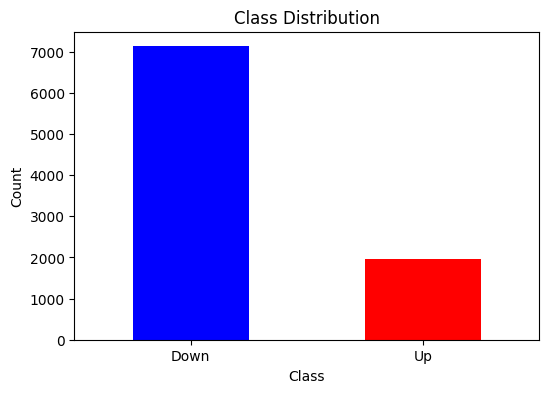

In [24]:

# Calculate daily returns and create a binary classification

df['Daily_Return'] = df['Adj Close'].pct_change()
df['Price_Direction'] = df['Daily_Return'].apply(lambda x: 'Up' if x > 0 else 'Down')


# binary classification based on the mean
mean_adj_close = df['Adj Close'].mean()
df['Price_Direction'] = df['Adj Close'].apply(lambda x: 'Up' if x > mean_adj_close else 'Down')

# Select features (X) and the target (y)
X = df[['Open', 'High', 'Low', 'Volume']].values
y = df['Price_Direction'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

class_distribution = df['Price_Direction'].value_counts()
class_proportions = class_distribution / len(df)

percentage_distribution = class_proportions * 100

print("Class Distribution:")
print(class_distribution)

print("\nClass Proportions (as percentages):")
print(percentage_distribution)

# Plot a bar chart of class distribution
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=0)
plt.show()

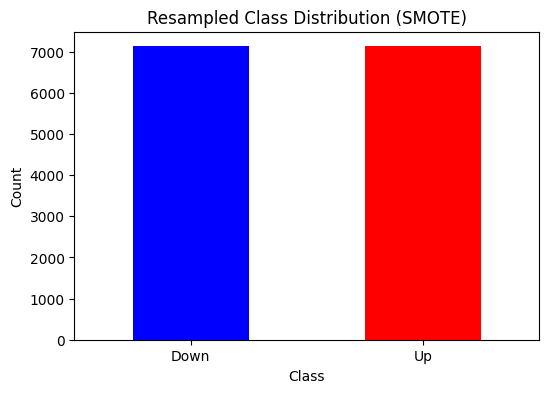

In [25]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Calculate and display resampled class distribution
class_distribution_resampled = pd.Series(y_resampled).value_counts()

# Plot a bar chart of the resampled class distribution
plt.figure(figsize=(6, 4))
class_distribution_resampled.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Resampled Class Distribution (SMOTE)')
plt.xticks(rotation=0)
plt.show()


In [26]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


Support Vector Machine Classifier Metrics:
Accuracy: 0.84
Precision: 0.83
Recall: 0.86
F1-Score: 0.84
Confusion Matrix:


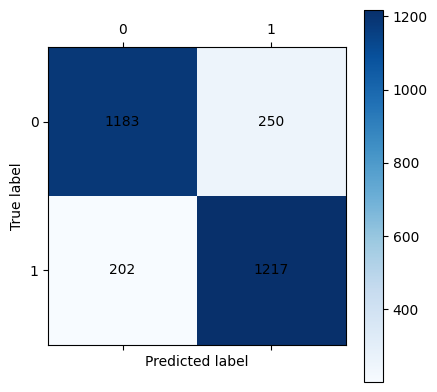

In [27]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, pos_label='Up')
recall_svm = recall_score(y_test, y_pred_svm, pos_label='Up')
f1_svm = f1_score(y_test, y_pred_svm, pos_label='Up')


# Print evaluation metrics
print("Support Vector Machine Classifier Metrics:")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1-Score: {f1_svm:.2f}")
print("Confusion Matrix:")
plot_confusion_matrix(y_test, y_pred_svm)

Gaussian Naive Bayes Classifier Metrics:
Accuracy: 0.78
Precision: 0.71
Recall: 0.93
F1-Score: 0.81
Confusion Matrix:
[[ 894  539]
 [  99 1320]]
AUC-ROC Score: 0.91


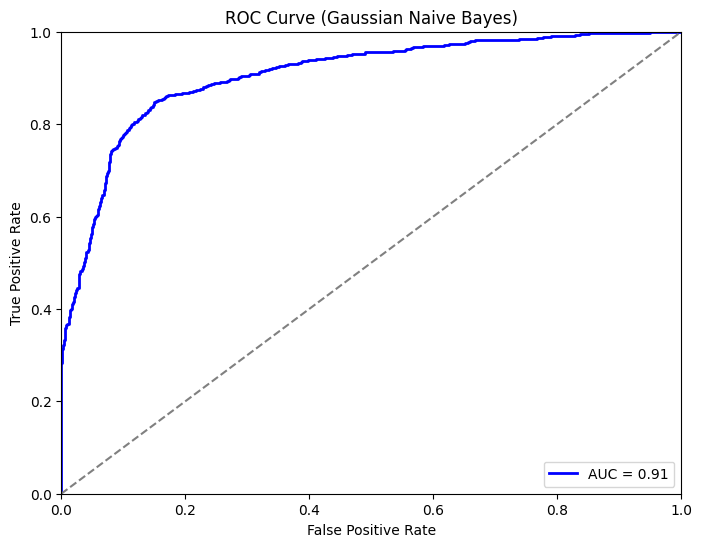

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
y_pred_gnb = gnb_classifier.predict(X_test)
y_probs_gnb = gnb_classifier.predict_proba(X_test)[:, 1]

accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb, pos_label='Up')
recall_gnb = recall_score(y_test, y_pred_gnb, pos_label='Up')
f1_gnb = f1_score(y_test, y_pred_gnb, pos_label='Up')
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)

fpr, tpr, thresholds = roc_curve(y_test, y_probs_gnb, pos_label='Up')
auc_roc = roc_auc_score(y_test, y_probs_gnb)

print("Gaussian Naive Bayes Classifier Metrics:")
print(f"Accuracy: {accuracy_gnb:.2f}")
print(f"Precision: {precision_gnb:.2f}")
print(f"Recall: {recall_gnb:.2f}")
print(f"F1-Score: {f1_gnb:.2f}")
print("Confusion Matrix:")
print(conf_matrix_gnb)

print(f"AUC-ROC Score: {auc_roc:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Gaussian Naive Bayes)')
plt.legend(loc='lower right')
plt.show()


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)


accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, pos_label='Up')
recall_knn = recall_score(y_test, y_pred_knn, pos_label='Up')
f1_knn = f1_score(y_test, y_pred_knn, pos_label='Up')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Print evaluation metrics
print("K-Nearest Neighbors (KNN) Classifier Metrics:")
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1-Score: {f1_knn:.2f}")
print("Confusion Matrix:")
print(conf_matrix_knn)


K-Nearest Neighbors (KNN) Classifier Metrics:
Accuracy: 0.85
Precision: 0.85
Recall: 0.84
F1-Score: 0.85
Confusion Matrix:
[[1223  210]
 [ 222 1197]]


Decision Tree Classifier Metrics:
Accuracy: 0.98
Precision: 0.96
Recall: 1.00
F1-Score: 0.98
Confusion Matrix:
[[1380   53]
 [   6 1413]]
AUC-ROC Score: 0.99


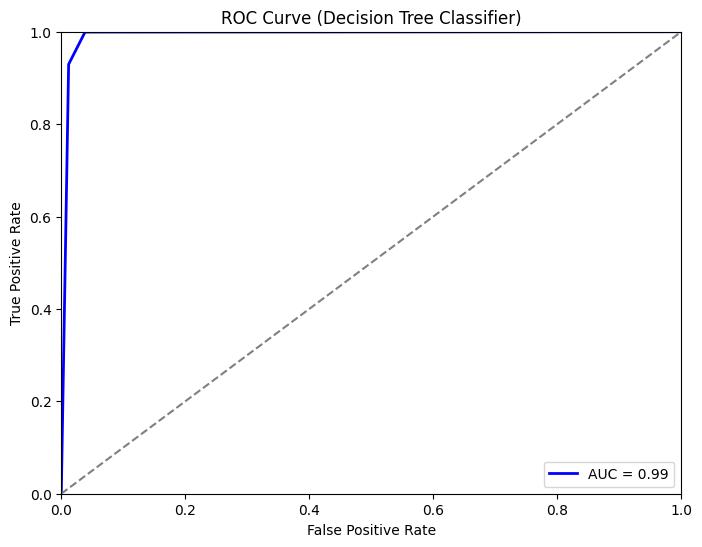

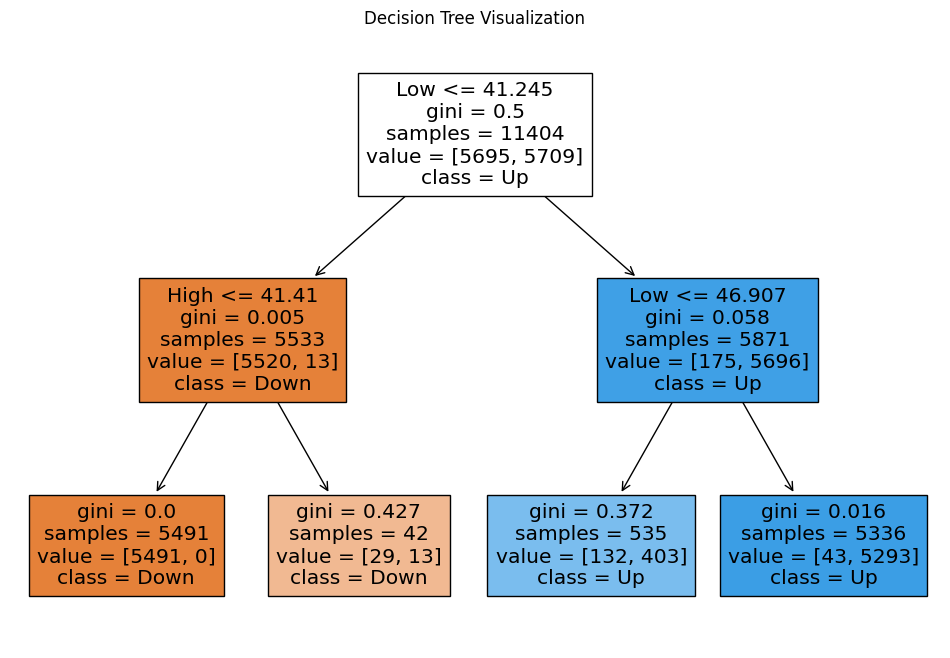

In [30]:
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

dt_classifier = DecisionTreeClassifier(max_depth = 2)
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)
y_probs_dt = dt_classifier.predict_proba(X_test)[:, 1]

# Evaluate the Decision Tree Classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, pos_label='Up')
recall_dt = recall_score(y_test, y_pred_dt, pos_label='Up')
f1_dt = f1_score(y_test, y_pred_dt, pos_label='Up')
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)


fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_probs_dt, pos_label='Up')
auc_roc_dt = roc_auc_score(y_test, y_probs_dt)

# Print evaluation metrics
print("Decision Tree Classifier Metrics:")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1-Score: {f1_dt:.2f}")
print("Confusion Matrix:")
print(conf_matrix_dt)

# Print the AUC-ROC score
print(f"AUC-ROC Score: {auc_roc_dt:.2f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'AUC = {auc_roc_dt:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree Classifier)')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=['Open', 'High', 'Low', 'Volume'], class_names=['Down', 'Up'])
plt.title("Decision Tree Visualization")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Classifier Metrics:
Accuracy: 0.50
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
Confusion Matrix:
[[1433    0]
 [1419    0]]
AUC-ROC Score: 0.89


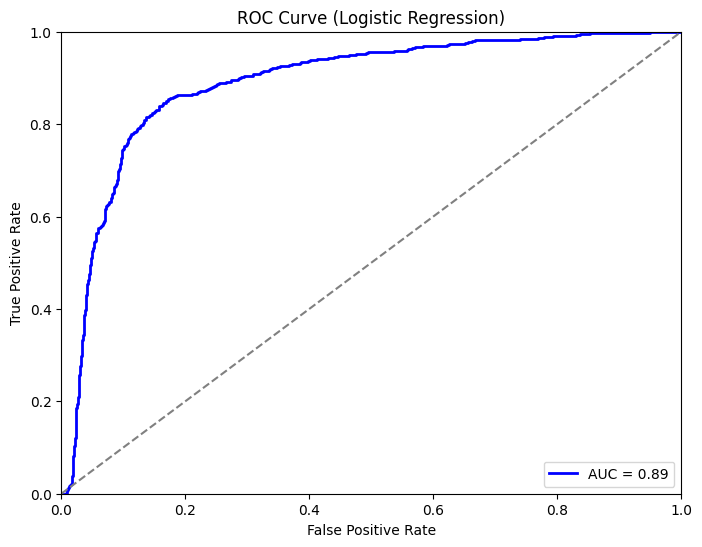

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)
y_pred_logistic = logistic_classifier.predict(X_test)

y_probs_logistic = logistic_classifier.predict_proba(X_test)[:, 1]


accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, pos_label='Up')
recall_logistic = recall_score(y_test, y_pred_logistic, pos_label='Up')
f1_logistic = f1_score(y_test, y_pred_logistic, pos_label='Up')
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)


fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_probs_logistic, pos_label='Up')


auc_roc_logistic = roc_auc_score(y_test, y_probs_logistic)

# Print evaluation metrics
print("Logistic Regression Classifier Metrics:")
print(f"Accuracy: {accuracy_logistic:.2f}")
print(f"Precision: {precision_logistic:.2f}")
print(f"Recall: {recall_logistic:.2f}")
print(f"F1-Score: {f1_logistic:.2f}")
print("Confusion Matrix:")
print(conf_matrix_logistic)

print(f"AUC-ROC Score: {auc_roc_logistic:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label=f'AUC = {auc_roc_logistic:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend(loc='lower right')
plt.show()


 Ensemble technique : Boosting to improve LogisticRegression

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Classifier Metrics:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-Score: 0.98
Confusion Matrix:
[[1411   22]
 [  22 1397]]
AUC-ROC Score: 1.00


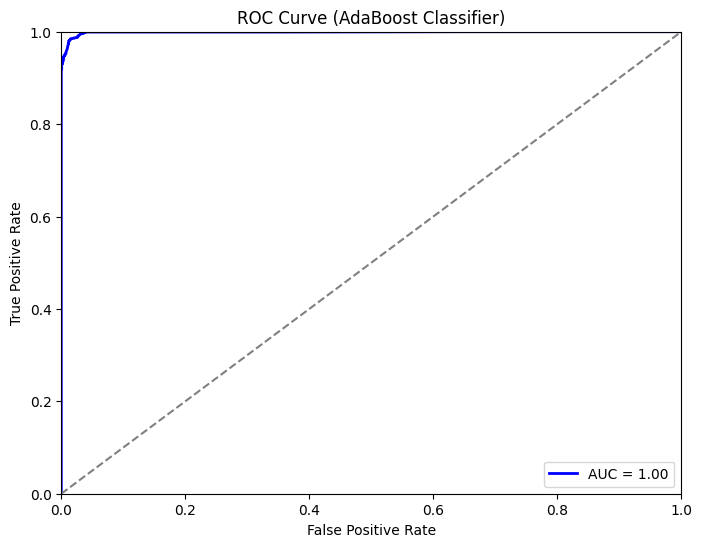

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(base_estimator=base_estimator)

adaboost_classifier.fit(X_train, y_train)


y_pred_adaboost = adaboost_classifier.predict(X_test)

y_probs_adaboost = adaboost_classifier.predict_proba(X_test)[:, 1]

accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost, pos_label='Up')
recall_adaboost = recall_score(y_test, y_pred_adaboost, pos_label='Up')
f1_adaboost = f1_score(y_test, y_pred_adaboost, pos_label='Up')
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)


fpr_adaboost, tpr_adaboost, thresholds_adaboost = roc_curve(y_test, y_probs_adaboost, pos_label='Up')

auc_roc_adaboost = roc_auc_score(y_test, y_probs_adaboost)

# Print evaluation metrics
print("AdaBoost Classifier Metrics:")
print(f"Accuracy: {accuracy_adaboost:.2f}")
print(f"Precision: {precision_adaboost:.2f}")
print(f"Recall: {recall_adaboost:.2f}")
print(f"F1-Score: {f1_adaboost:.2f}")
print("Confusion Matrix:")
print(conf_matrix_adaboost)

print(f"AUC-ROC Score: {auc_roc_adaboost:.2f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_adaboost, tpr_adaboost, color='blue', lw=2, label=f'AUC = {auc_roc_adaboost:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AdaBoost Classifier)')
plt.legend(loc='lower right')
plt.show()


ensemble : Random forest

Random Forest Classifier Metrics:
Accuracy: 0.99
Precision: 0.98
Recall: 0.99
F1-Score: 0.99
Confusion Matrix:
[[1410   23]
 [  18 1401]]
AUC-ROC Score: 1.00


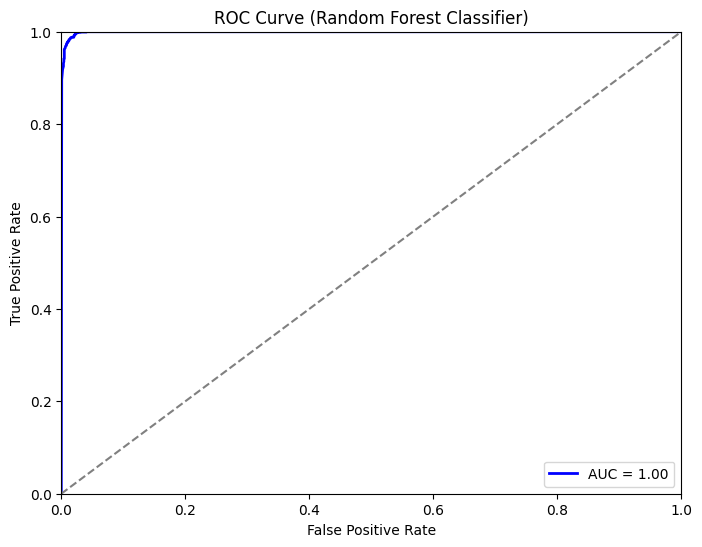

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

y_probs_rf = rf_classifier.predict_proba(X_test)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label='Up')
recall_rf = recall_score(y_test, y_pred_rf, pos_label='Up')
f1_rf = f1_score(y_test, y_pred_rf, pos_label='Up')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_probs_rf, pos_label='Up')

auc_roc_rf = roc_auc_score(y_test, y_probs_rf)


print("Random Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")
print("Confusion Matrix:")
print(conf_matrix_rf)


print(f"AUC-ROC Score: {auc_roc_rf:.2f}")


plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'AUC = {auc_roc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest Classifier)')
plt.legend(loc='lower right')
plt.show()
